# Credit Risk - Data Preprocessing
by Ehsan Fazel

## Examine the Dataset 

In this document, I preprocess the data to be used in the future for calculating the probability of default (PD) model. I start by examining the dataset, splitting it into train and test set. And then I move on to calculate and visualize Weight of Evidence (WoE). This procedure is done both for discrete and continuous variables. At the end of the document, I go back and repeat the whole process for the test set and save the results.

In [1]:
import numpy as np
import pandas as pd
import sklearn 
from sklearn import linear_model
from sklearn.utils import shuffle

In [2]:
backup_data = pd.read_csv('loan_final313.csv')
dt_loan = backup_data.copy()

In [3]:
dt_loan.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [4]:
dt_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    887379 non-null  int64  
 1   year                  887379 non-null  int64  
 2   issue_d               887379 non-null  object 
 3   final_d               887379 non-null  int64  
 4   emp_length_int        887379 non-null  float64
 5   home_ownership        887379 non-null  object 
 6   home_ownership_cat    887379 non-null  int64  
 7   income_category       887379 non-null  object 
 8   annual_inc            887379 non-null  int64  
 9   income_cat            887379 non-null  int64  
 10  loan_amount           887379 non-null  int64  
 11  term                  887379 non-null  object 
 12  term_cat              887379 non-null  int64  
 13  application_type      887379 non-null  object 
 14  application_type_cat  887379 non-null  int64  
 15  

The variables can be categorized into two: discrete and continuous. Some continuous variables such as 'emp_length_int' need to be converted from string to integer. To do so, we can keep the integer and replace the string part with none. Later on, we can convert it to integer.

In [7]:
type(dt_loan['emp_length_int'][0])

numpy.float64

In [8]:
dt_loan['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
887374     36 months
887375     36 months
887376     60 months
887377     60 months
887378     36 months
Name: term, Length: 887379, dtype: object

In [9]:
dt_loan['term'].describe()

count         887379
unique             2
top        36 months
freq          621125
Name: term, dtype: object

In [10]:
# convert term into integer. replace months with blank
dt_loan['term_int'] = dt_loan['term'].str.replace(' months', '')
dt_loan['term_int']

0          36
1          60
2          36
3          36
4          60
         ... 
887374     36
887375     36
887376     60
887377     60
887378     36
Name: term_int, Length: 887379, dtype: object

In [11]:
dt_loan['term_int'] = pd.to_numeric(dt_loan['term'].str.replace(' months', ''))
dt_loan['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
887374    36
887375    36
887376    60
887377    60
887378    36
Name: term_int, Length: 887379, dtype: int64

Variable 'issue date' needs to be converted to date variable from string.

In [12]:
dt_loan['issue_d']

0         01/12/2011
1         01/12/2011
2         01/12/2011
3         01/12/2011
4         01/12/2011
             ...    
887374    01/01/2015
887375    01/01/2015
887376    01/01/2015
887377    01/01/2015
887378    01/01/2015
Name: issue_d, Length: 887379, dtype: object

In [13]:
dt_loan['issue_d_date'] = pd.to_datetime(dt_loan['issue_d'], format = '%d/%m/%Y')

In [14]:
dt_loan['issue_d_date']

0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
887374   2015-01-01
887375   2015-01-01
887376   2015-01-01
887377   2015-01-01
887378   2015-01-01
Name: issue_d_date, Length: 887379, dtype: datetime64[ns]

## Preprocessing discrete variables

The discrete variables that we consider are the following:

- grade
- home ownership
- purpose
- region
- loan condition

In [15]:
dt_loan['grade']

0         B
1         C
2         C
3         C
4         B
         ..
887374    B
887375    B
887376    D
887377    E
887378    B
Name: grade, Length: 887379, dtype: object

In [16]:
pd.get_dummies(dt_loan['grade'])

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
887374,0,1,0,0,0,0,0
887375,0,1,0,0,0,0,0
887376,0,0,0,1,0,0,0
887377,0,0,0,0,1,0,0


In [17]:
# save all the dummies into a list

dt_loan_dummies = [pd.get_dummies(dt_loan['grade'], prefix = 'grade', prefix_sep = ':'),
                   pd.get_dummies(dt_loan['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                   pd.get_dummies(dt_loan['purpose'], prefix = 'purpose', prefix_sep = ':'),
                   pd.get_dummies(dt_loan['region'], prefix = 'region', prefix_sep = ':'),
                   pd.get_dummies(dt_loan['loan_condition'], prefix = 'loan_condition', prefix_sep = ':')]

In [18]:
# concat them
dt_loan_dummies = pd.concat(dt_loan_dummies, axis = 1)

In [19]:
type(dt_loan_dummies)

pandas.core.frame.DataFrame

In [20]:
dt_loan.columns.values

array(['id', 'year', 'issue_d', 'final_d', 'emp_length_int',
       'home_ownership', 'home_ownership_cat', 'income_category',
       'annual_inc', 'income_cat', 'loan_amount', 'term', 'term_cat',
       'application_type', 'application_type_cat', 'purpose',
       'purpose_cat', 'interest_payments', 'interest_payment_cat',
       'loan_condition', 'loan_condition_cat', 'interest_rate', 'grade',
       'grade_cat', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries',
       'installment', 'region', 'term_int', 'issue_d_date'], dtype=object)

In [21]:
dt_loan = pd.concat([dt_loan, dt_loan_dummies], axis = 1)

In [24]:
dt_loan['loan_condition']

0         Good Loan
1          Bad Loan
2         Good Loan
3         Good Loan
4         Good Loan
            ...    
887374    Good Loan
887375    Good Loan
887376    Good Loan
887377    Good Loan
887378    Good Loan
Name: loan_condition, Length: 887379, dtype: object

In [25]:
# convert loan_condition to 1/0
dt_loan['good_bad'] = np.where(dt_loan['loan_condition'].isin(['Bad Loan']), 0, 1)

In [26]:
dt_loan['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
887374    1
887375    1
887376    1
887377    1
887378    1
Name: good_bad, Length: 887379, dtype: int32

## Check for Missing Values:

In [22]:
# Check for all missing values
pd.options.display.max_rows = None
dt_loan.isnull().sum()

id                            0
year                          0
issue_d                       0
final_d                       0
emp_length_int                0
home_ownership                0
home_ownership_cat            0
income_category               0
annual_inc                    0
income_cat                    0
loan_amount                   0
term                          0
term_cat                      0
application_type              0
application_type_cat          0
purpose                       0
purpose_cat                   0
interest_payments             0
interest_payment_cat          0
loan_condition                0
loan_condition_cat            0
interest_rate                 0
grade                         0
grade_cat                     0
dti                           0
total_pymnt                   0
total_rec_prncp               0
recoveries                    0
installment                   0
region                        0
term_int                      0
issue_d_

In [23]:
pd.options.display.max_rows = 100

### Split the Data

In [27]:
dt_loan_inputs_train, dt_loan_inputs_test, dt_loan_targets_train, dt_loan_targets_test = sklearn.model_selection.train_test_split(dt_loan.drop('good_bad', axis = 1),
                                                                                                          dt_loan['good_bad'], test_size = 0.2, random_state = 42)

In [28]:
# check the dimensions:
dt_loan_inputs_train.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,purpose:small_business,purpose:vacation,purpose:wedding,region:Northern-Irl,region:cannught,region:leinster,region:munster,region:ulster,loan_condition:Bad Loan,loan_condition:Good Loan
329489,24043908,2014,01/08/2014,1012016,5.0,OWN,2,Low,47000,1,...,0,0,0,1,0,0,0,0,0,1
510073,65677198,2015,01/11/2015,1012016,7.0,MORTGAGE,3,Low,90000,1,...,0,0,0,1,0,0,0,0,0,1
905,1058556,2011,01/12/2011,1022014,6.0,MORTGAGE,3,Low,45500,1,...,0,0,0,0,0,1,0,0,0,1
333036,23133441,2014,01/07/2014,1012016,8.0,MORTGAGE,3,Low,55000,1,...,0,0,0,0,0,0,0,1,0,1
298787,28693850,2014,01/10/2014,1102015,0.5,RENT,1,Low,34000,1,...,0,0,0,1,0,0,0,0,1,0


## Calculating and Vizualizing Weight of Evidence for Discrete Variables

$$ WoE_{i} = ln(\frac{GoodDistribution}{BadDistribution})$$

In [33]:
# declare the prepr inputs and targets for train set
df_inputs_prepr = dt_loan_inputs_train
df_targets_prepr = dt_loan_targets_train

In [34]:
# Start with garde:
df_inputs_prepr['grade'].unique()

array(['D', 'C', 'B', 'A', 'E', 'F', 'G'], dtype=object)

In [35]:
def woe_discrete(df, name, good_bad):
    """
    This function calculates weight-of-evidence for a discrete variable in the data set.
    
    Inputs: 
        - df: data frame of either train or test sets.
        - name: name of the discrete variable.
        - good_bad: a column that shows the good/bad loan in the train or test sets.
    
    Output:
        - a table that presents WoE and IV.
    """
    # create a table that contains the variable, number of observations for that variable, and the propotion of good_bad loans
    df = pd.concat([df[name], good_bad], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    
    # drop one repetative column
    df = df.iloc[:, [0, 1, 3]]
    
    # rename the columns, (the variable, number of observation of each category, propotion of good loans)
    df.columns = [df.columns.values[0], 'num_obs', 'prop_good']
    
    # add the percentage based on the number of observation for each category
    df['prop_num_obs'] = df['num_obs'] / df['num_obs'].sum()
    
    # get the number of good and bad loans
    df['num_good'] = df['prop_good'] * df['num_obs']
    df['num_bad'] = (1 - df['prop_good']) * df['num_obs']
    
    # propotion of good and bad loans by number of good and bad loans
    df['prop_num_good'] = df['num_good'] / df['num_good'].sum()
    df['prop_num_bad'] = df['num_bad'] / df['num_bad'].sum()
    
    # get the weight of evidence
    df['WoE'] = np.log(df['prop_num_good'] / df['prop_num_bad'])
    
    # sort by WoE and reset the index
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    
    # get the difference in propotion of good loans and WoE
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    # get the IV and return the dataframe
    df['IV'] = (df['prop_num_good'] - df['prop_num_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [36]:
# comute the table for variable 'grade'
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,num_obs,prop_good,prop_num_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,4385,0.771038,0.006177,3381.0,1004.0,0.005154,0.018631,-1.285076,NaN,NaN,0.328045
1,F,18399,0.810968,0.025918,14921.0,3478.0,0.022745,0.064540,-1.042944,0.039930,0.242133,0.328045
2,E,56544,0.861099,0.079650,48690.0,7854.0,0.074221,0.145744,-0.674805,0.050131,0.368139,0.328045
3,D,111637,0.886149,0.157257,98927.0,12710.0,0.150800,0.235855,-0.447263,0.025050,0.227542,0.328045
4,C,196689,0.922634,0.277065,181472.0,15217.0,0.276628,0.282377,-0.020568,0.036485,0.426695,0.328045
5,B,203700,0.947521,0.286941,193010.0,10690.0,0.294216,0.198371,0.394178,0.024887,0.414745,0.328045
6,A,118549,0.975234,0.166993,115613.0,2936.0,0.176236,0.054482,1.173945,0.027713,0.779767,0.328045


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [38]:
def plot_woe(df_WoE, rotation_axis = 0):
    """
    This function plots the WoE for each category of the discrete variable
    
    Inputs:
        - df_WoE: the dataframe that was obtain by WoE function
        - rotation_axis is the angle that the axis is shown. This is handy when the names of categories is long
        
    Output:
        - plot of WoE by category
    """
    # x axis is the name of each category
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    
    # select WoE as y
    y = df_WoE['WoE']
    
    # set the figure size
    plt.figure(figsize = (20,10))
    
    # plot x and y
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    
    # label the axis
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    
    # title
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    
    # rotate x axis
    plt.xticks(rotation = rotation_axis)

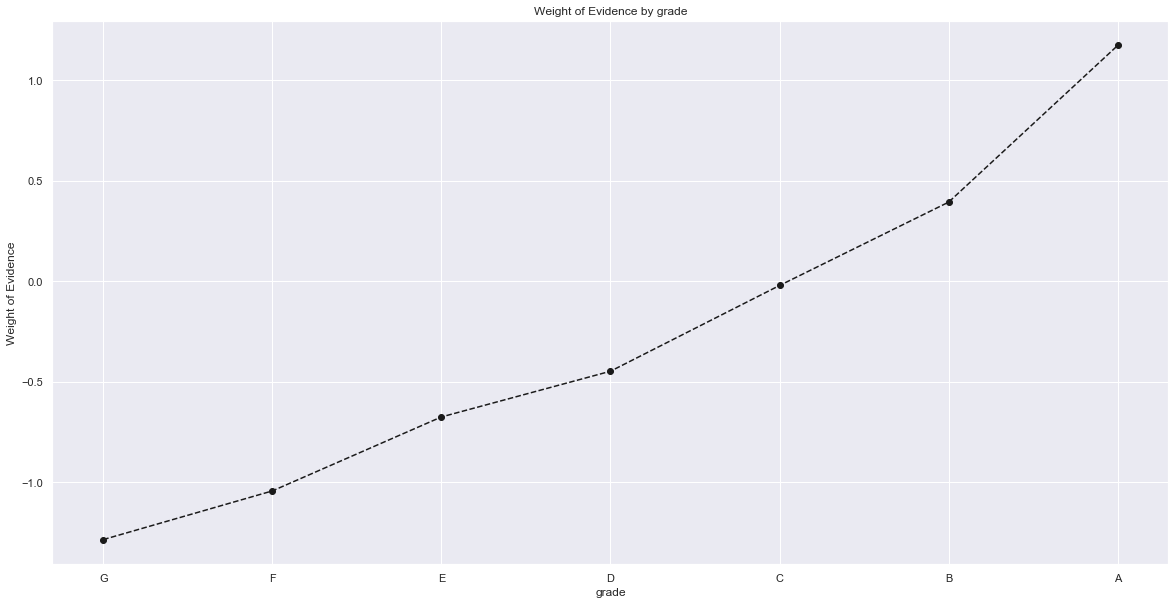

In [39]:
plot_woe(df_temp)

In [40]:
#home ownership
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,num_obs,prop_good,prop_num_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,141,0.794326,0.000199,112.0,29.0,0.000171,0.000538,-1.148053,NaN,NaN,inf
1,NONE,38,0.815789,0.000054,31.0,7.0,0.000047,0.000130,-1.011179,0.021463,0.136874,inf
2,RENT,284609,0.911802,0.400913,259507.0,25102.0,0.395581,0.465809,-0.163420,0.096012,0.847759,inf
3,OWN,69987,0.928029,0.098587,64950.0,5037.0,0.099007,0.093470,0.057551,0.016228,0.220971,inf
4,MORTGAGE,355125,0.933224,0.500244,331411.0,23714.0,0.505189,0.440053,0.138038,0.005194,0.080487,inf
5,ANY,3,1.000000,0.000004,3.0,0.0,0.000005,0.000000,inf,0.066776,inf,inf


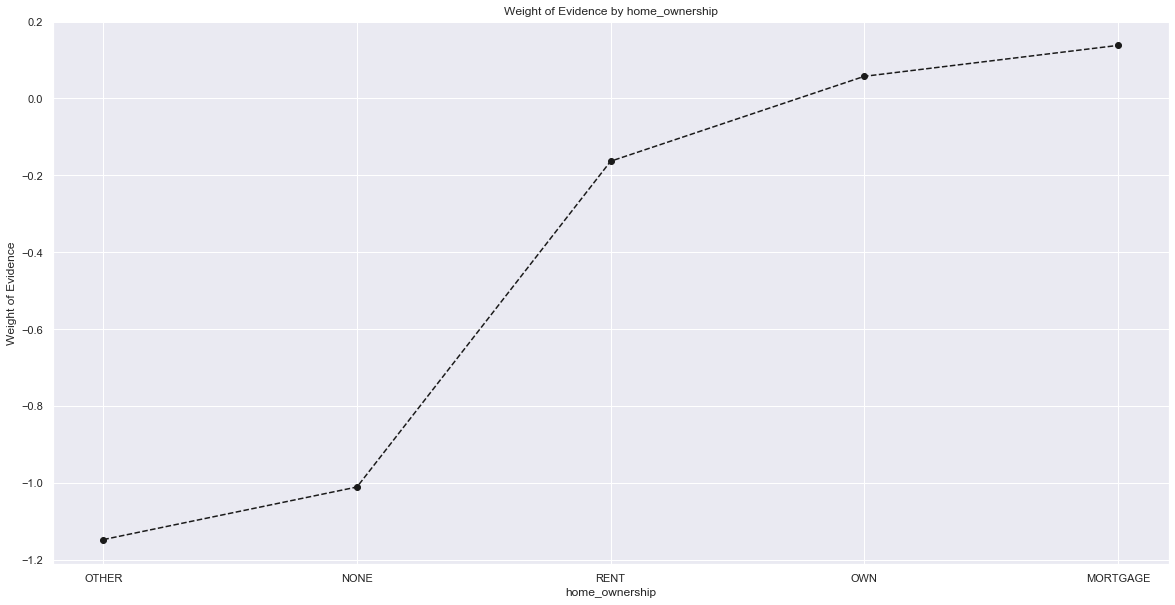

In [41]:
plot_woe(df_temp)

In [42]:
# we need to combine some categories. 
# 'OTHER', 'NONE' and 'ANY' have the same level of risk and there are few observation in all. So we should combine them 
# with the next riskiest group 'RENT'.
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [44]:
# region
df_inputs_prepr['region'].unique()

array(['Northern-Irl', 'leinster', 'ulster', 'munster', 'cannught'],
      dtype=object)

In [45]:
df_temp = woe_discrete(df_inputs_prepr, 'region', df_targets_prepr)
df_temp

,region,num_obs,prop_good,prop_num_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,Northern-Irl,163360,0.921125,0.230116,150475.0,12885.0,0.229378,0.239103,-0.041523,NaN,NaN,0.002955
1,ulster,167107,0.921380,0.235394,153969.0,13138.0,0.234704,0.243797,-0.038013,0.000255,0.003509,0.002955
2,leinster,171695,0.922525,0.241857,158393.0,13302.0,0.241448,0.246841,-0.022091,0.001146,0.015922,0.002955
3,munster,83863,0.929444,0.118133,77946.0,5917.0,0.118818,0.109800,0.078931,0.006919,0.101022,0.002955
4,cannught,123878,0.930197,0.174500,115231.0,8647.0,0.175653,0.160459,0.090471,0.000753,0.011540,0.002955


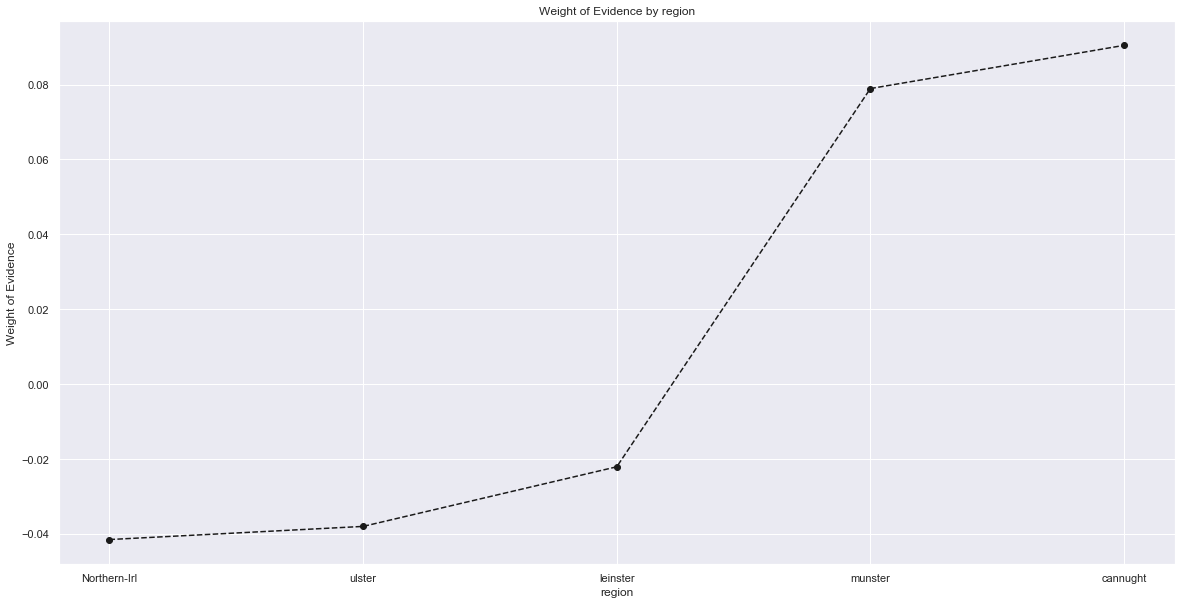

In [46]:
plot_woe(df_temp)

In [47]:
# purpose
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,num_obs,prop_good,prop_num_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,328,0.783537,0.000462,257.0,71.0,0.000392,0.001318,-1.212860,NaN,NaN,0.045184
1,small_business,8307,0.828699,0.011702,6884.0,1423.0,0.010494,0.026406,-0.922823,0.045162,0.290036,0.045184
2,wedding,1873,0.873465,0.002638,1636.0,237.0,0.002494,0.004398,-0.567306,0.044766,0.355517,0.045184
3,renewable_energy,463,0.883369,0.000652,409.0,54.0,0.000623,0.001002,-0.474525,0.009904,0.092782,0.045184
4,moving,4306,0.888528,0.006066,3826.0,480.0,0.005832,0.008907,-0.423467,0.005158,0.051058,0.045184
5,house,2960,0.888851,0.004170,2631.0,329.0,0.004011,0.006105,-0.420194,0.000324,0.003272,0.045184
6,other,34307,0.902469,0.048326,30961.0,3346.0,0.047196,0.062091,-0.274293,0.013618,0.145901,0.045184
7,medical,6845,0.906647,0.009642,6206.0,639.0,0.009460,0.011858,-0.225888,0.004178,0.048405,0.045184
8,vacation,3771,0.916468,0.005312,3456.0,315.0,0.005268,0.005845,-0.103961,0.009821,0.121927,0.045184
9,debt_consolidation,419504,0.920756,0.590931,386261.0,33243.0,0.588800,0.616879,-0.046587,0.004289,0.057375,0.045184


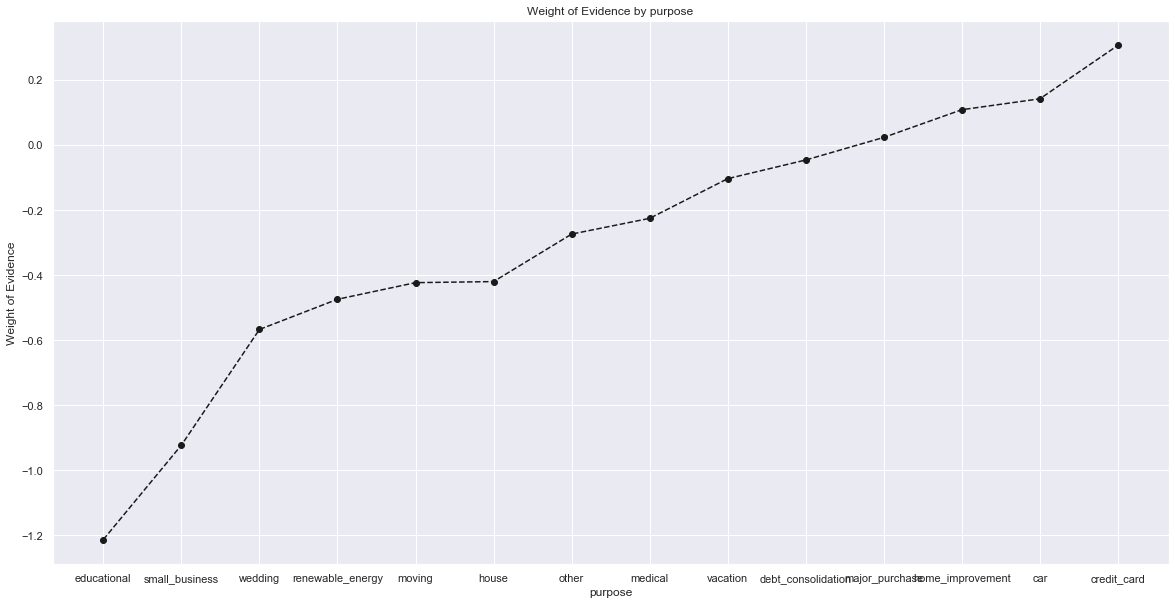

In [48]:
plot_woe(df_temp)

In [50]:
# combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', and 'house'
# combine 'otehr', 'medical', and'vacation'
# combine 'major purchase', 'home improvement', and 'car'
df_inputs_prepr['purpose:educ_smb_wedd_energy_mov_house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                df_inputs_prepr['purpose:renewable_energy'], df_inputs_prepr['purpose:moving'],
                                                                df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:other_medic_vac'] =sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                                                df_inputs_prepr['purpose:vacation']]) 
df_inputs_prepr['purpose:maj_improv_car'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:home_improvement'],
                                                                df_inputs_prepr['purpose:car']]) 

## Calculating and Vizualizing Weight of Evidence for Continuous Variables


In [54]:
def woe_continuous(df, name, good_bad):
    """
    This function calculates weight-of-evidence for a discrete variable in the data set.
    
    Inputs: 
        - df: data frame of either train or test sets.
        - name: name of the discrete variable.
        - good_bad: a column that shows the good/bad loan in the train or test sets.
    
    Output:
        - a table that presents WoE and IV.
    """
    # create a table that contains the variable, number of observations for that variable, and the propotion of good_bad loans
    df = pd.concat([df[name], good_bad], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    
    # drop one repetative column
    df = df.iloc[:, [0, 1, 3]]
    
    # rename the columns, (the variable, number of observation of each category, propotion of good loans)
    df.columns = [df.columns.values[0], 'num_obs', 'prop_good']
    
    # add the percentage based on the number of observation for each category
    df['prop_num_obs'] = df['num_obs'] / df['num_obs'].sum()
    
    # get the number of good and bad loans
    df['num_good'] = df['prop_good'] * df['num_obs']
    df['num_bad'] = (1 - df['prop_good']) * df['num_obs']
    
    # propotion of good and bad loans by number of good and bad loans
    df['prop_num_good'] = df['num_good'] / df['num_good'].sum()
    df['prop_num_bad'] = df['num_bad'] / df['num_bad'].sum()
    
    # get the weight of evidence
    df['WoE'] = np.log(df['prop_num_good'] / df['prop_num_bad'])
    
    # get the difference in propotion of good loans and WoE
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    # get the IV and return the dataframe
    df['IV'] = (df['prop_num_good'] - df['prop_num_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [55]:
# term
df_inputs_prepr['term_int'].unique()

array([60, 36], dtype=int64)

In [56]:
df_temp = woe_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,num_obs,prop_good,prop_num_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,496644,0.930999,0.699594,462375.0,34269.0,0.704825,0.635918,0.102879,NaN,NaN,0.021546
1,60,213259,0.907999,0.300406,193639.0,19620.0,0.295175,0.364082,-0.209810,0.023,0.312689,0.021546


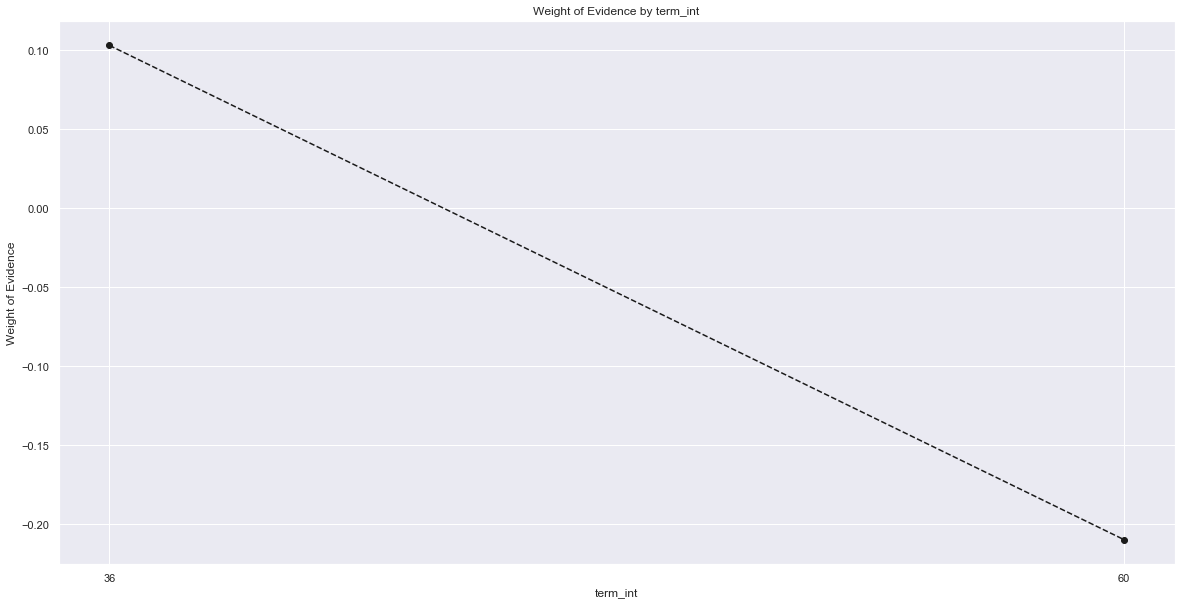

In [57]:
plot_woe(df_temp)

In [58]:
# term of 60 months is the reference category
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [59]:
# employment length
df_inputs_prepr['emp_length_int'].unique()

array([ 5.  ,  7.  ,  6.  ,  8.  ,  0.5 , 10.  ,  3.  ,  9.  ,  1.  ,
        2.  ,  4.  ,  6.05])

In [60]:
df_temp = woe_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,num_obs,prop_good,prop_num_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.50,56448,0.917056,0.079515,51766.0,4682.0,0.078910,0.086882,-0.096248,NaN,NaN,0.008735
1,1.00,45480,0.921218,0.064065,41897.0,3583.0,0.063866,0.066489,-0.040242,0.004162,0.056006,0.008735
2,2.00,63051,0.923808,0.088816,58247.0,4804.0,0.088789,0.089146,-0.004012,0.002590,0.036230,0.008735
3,3.00,55968,0.922742,0.078839,51644.0,4324.0,0.078724,0.080239,-0.019063,0.001066,0.015051,0.008735
4,4.00,42024,0.922782,0.059197,38779.0,3245.0,0.059113,0.060216,-0.018492,0.000041,0.000570,0.008735
5,5.00,44495,0.918530,0.062678,40870.0,3625.0,0.062300,0.067268,-0.076714,0.004252,0.058222,0.008735
6,6.00,34470,0.910705,0.048556,31392.0,3078.0,0.047853,0.057117,-0.176983,0.007825,0.100269,0.008735
7,6.05,35823,0.917539,0.050462,32869.0,2954.0,0.050104,0.054816,-0.089886,0.006834,0.087097,0.008735
8,7.00,35654,0.915241,0.050224,32632.0,3022.0,0.049743,0.056078,-0.119881,0.002298,0.029995,0.008735
9,8.00,35102,0.926044,0.049446,32506.0,2596.0,0.049551,0.048173,0.028197,0.010803,0.148078,0.008735


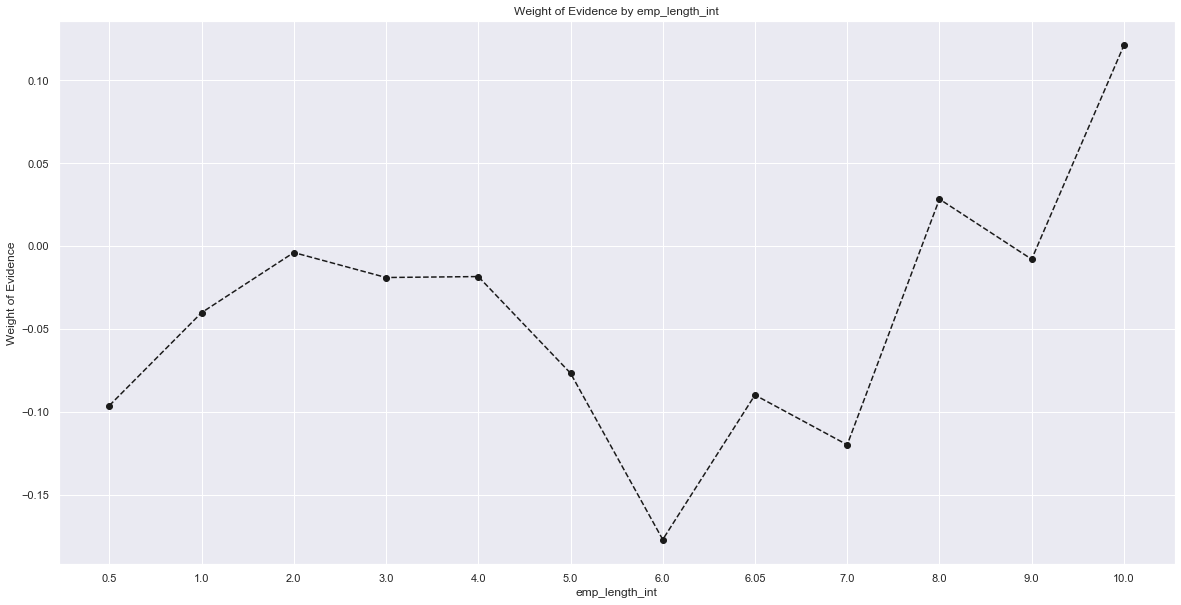

In [61]:
plot_woe(df_temp)

In [62]:
# we create the following categories: 0, 1, 2-4, 5, 6, 7, 8, 9, 10, and 11
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5'] = np.where(df_inputs_prepr['emp_length_int'].isin([5]), 1, 0)
df_inputs_prepr['emp_length:6'] = np.where(df_inputs_prepr['emp_length_int'].isin([6]), 1, 0)
df_inputs_prepr['emp_length:7'] = np.where(df_inputs_prepr['emp_length_int'].isin([7]), 1, 0)
df_inputs_prepr['emp_length:8'] = np.where(df_inputs_prepr['emp_length_int'].isin([8]), 1, 0)
df_inputs_prepr['emp_length:9'] = np.where(df_inputs_prepr['emp_length_int'].isin([9]), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)
df_inputs_prepr['emp_length:11'] = np.where(df_inputs_prepr['emp_length_int'].isin([11]), 1, 0)

In [64]:
# interest rate
df_inputs_prepr['interest_rate'].unique()

array([16.29, 12.59, 10.65, 11.67, 12.99, 13.35,  7.12, 14.98, 12.29,
       11.53, 10.99, 18.55, 17.57,  7.26, 11.22, 19.99, 15.61,  6.68,
       25.78, 14.27,  8.9 , 25.99, 14.49, 13.11, 15.1 , 19.52, 19.2 ,
       12.69, 11.14, 13.33,  9.17, 18.99, 16.99, 19.19,  7.62, 16.55,
       11.55, 21.49, 18.25, 19.24, 25.8 ,  5.32, 25.57, 15.99, 11.86,
       18.84, 16.49, 13.99, 15.41, 13.68, 25.83, 14.99, 18.75, 17.77,
       14.09,  8.88, 19.72, 12.39, 14.65, 14.31, 11.28,  7.89, 10.64,
       21.  , 11.99,  8.18,  9.99,  6.24,  6.39, 21.48, 12.49,  6.49,
       19.22, 14.48, 13.67, 13.98,  6.03, 14.64, 18.2 ,  6.99, 10.15,
       22.99, 17.27, 10.49, 17.14, 18.92, 16.2 , 25.28,  7.69, 13.06,
       15.8 ,  8.39, 21.99, 17.56, 17.86, 24.89,  7.9 , 22.15, 14.33,
       19.29, 15.31, 10.16, 18.24, 13.66, 18.49,  6.89,  6.17, 13.49,
        8.49, 23.43, 20.99, 21.18, 15.7 , 12.35, 11.44,  8.19,  7.91,
       13.53, 15.23,  9.71,  9.91,  8.67, 15.59, 18.29, 24.5 , 13.18,
       11.48, 11.78,

In [66]:
# fine_classing using cut method:
df_inputs_prepr['interest_rate_factor'] = pd.cut(df_inputs_prepr['interest_rate'], 50)

In [67]:
df_temp = woe_continuous(df_inputs_prepr, 'interest_rate_factor', df_targets_prepr)
df_temp

,interest_rate_factor,num_obs,prop_good,prop_num_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.296, 5.793]",8514,0.993892,0.011993,8462.0,52.0,0.012899,0.000965,2.592841,NaN,NaN,0.525071
1,"(5.793, 6.267]",16578,0.987091,0.023352,16364.0,214.0,0.024945,0.003971,1.837607,0.006801,0.755234,0.525071
2,"(6.267, 6.74]",13061,0.977490,0.018398,12767.0,294.0,0.019461,0.005456,1.271783,0.009601,0.565824,0.525071
3,"(6.74, 7.214]",14521,0.985951,0.020455,14317.0,204.0,0.021824,0.003786,1.751827,0.008461,0.480044,0.525071
4,"(7.214, 7.687]",17541,0.976512,0.024709,17129.0,412.0,0.026111,0.007645,1.228249,0.009439,0.523578,0.525071
5,"(7.687, 8.16]",29445,0.972831,0.041477,28645.0,800.0,0.043665,0.014845,1.078867,0.003681,0.149382,0.525071
6,"(8.16, 8.634]",24791,0.981082,0.034922,24322.0,469.0,0.037075,0.008703,1.449278,0.008251,0.370411,0.525071
7,"(8.634, 9.107]",12385,0.943319,0.017446,11683.0,702.0,0.017809,0.013027,0.312701,0.037763,1.136577,0.525071
8,"(9.107, 9.581]",24505,0.980453,0.034519,24026.0,479.0,0.036624,0.008889,1.415936,0.037134,1.103235,0.525071
9,"(9.581, 10.054]",27211,0.967182,0.038331,26318.0,893.0,0.040118,0.016571,0.884166,0.013271,0.531769,0.525071


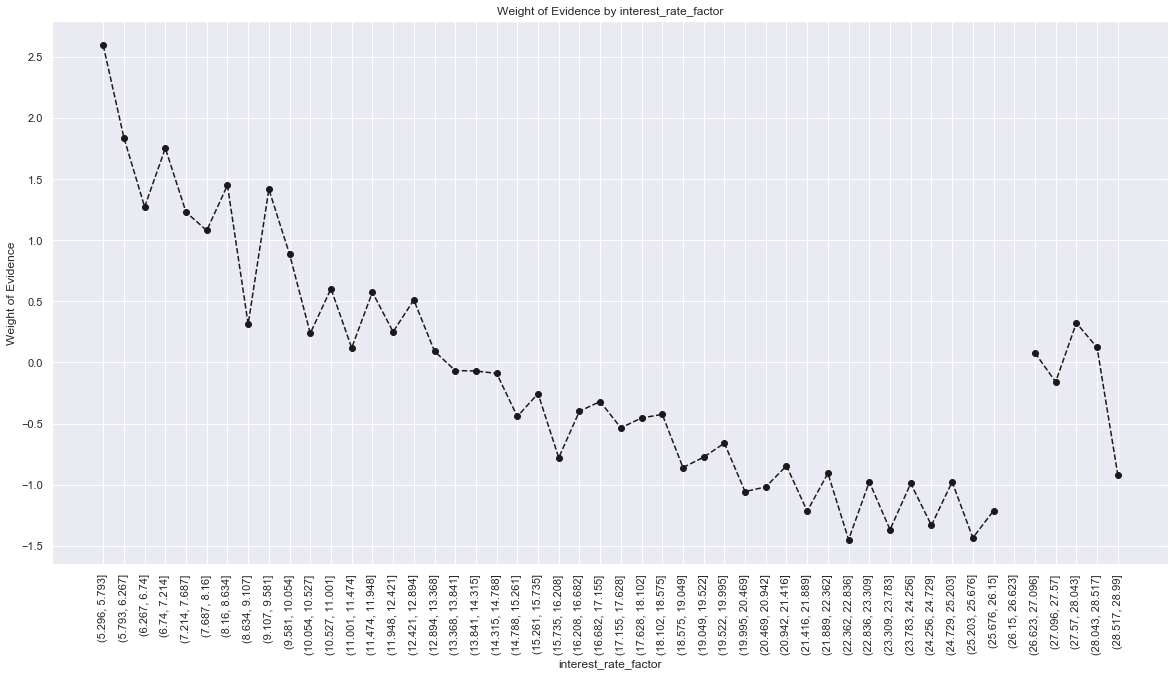

In [69]:
plot_woe(df_temp, 90)

In [71]:
df_inputs_prepr['interest_rate:<7.214'] = np.where((df_inputs_prepr['interest_rate'] <= 7.214), 1, 0)
df_inputs_prepr['interest_rate:7.214-10.54'] = np.where((df_inputs_prepr['interest_rate'] > 7.214) & (df_inputs_prepr['interest_rate'] <= 10.54), 1, 0)
df_inputs_prepr['interest_rate:10.54-11.948'] = np.where((df_inputs_prepr['interest_rate'] > 10.54) & (df_inputs_prepr['interest_rate'] <= 11.948), 1, 0)
df_inputs_prepr['interest_rate:11.948-14.31'] = np.where((df_inputs_prepr['interest_rate'] > 11.948) & (df_inputs_prepr['interest_rate'] <= 14.31), 1, 0)
df_inputs_prepr['interest_rate:>14.31'] = np.where((df_inputs_prepr['interest_rate'] > 14.31), 1, 0)

In [74]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

C:\Users\Thinkpad\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Thinkpad\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,num_obs,prop_good,prop_num_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9500.0, 190000.0]",692830,0.923453,0.975950,639796.0,53034.0,0.975278,0.984134,-0.009040,NaN,NaN,inf
1,"(190000.0, 380000.0]",15077,0.948796,0.021238,14305.0,772.0,0.021806,0.014326,0.420124,0.025343,0.429164,inf
2,"(380000.0, 570000.0]",1349,0.958488,0.001900,1293.0,56.0,0.001971,0.001039,0.640113,0.009692,0.219989,inf
3,"(570000.0, 760000.0]",362,0.953039,0.000510,345.0,17.0,0.000526,0.000315,0.511075,0.005449,0.129038,inf
4,"(760000.0, 950000.0]",120,0.941667,0.000169,113.0,7.0,0.000172,0.000130,0.282222,0.011372,0.228853,inf
5,"(950000.0, 1140000.0]",67,1.000000,0.000094,67.0,0.0,0.000102,0.000000,inf,0.058333,inf,inf
6,"(1140000.0, 1330000.0]",31,0.967742,0.000044,30.0,1.0,0.000046,0.000019,0.901942,0.032258,inf,inf
7,"(1330000.0, 1520000.0]",18,0.944444,0.000025,17.0,1.0,0.000026,0.000019,0.333958,0.023297,0.567984,inf
8,"(1520000.0, 1710000.0]",2,1.000000,0.000003,2.0,0.0,0.000003,0.000000,inf,0.055556,inf,inf
9,"(1710000.0, 1900000.0]",5,1.000000,0.000007,5.0,0.0,0.000008,0.000000,inf,0.000000,NaN,inf


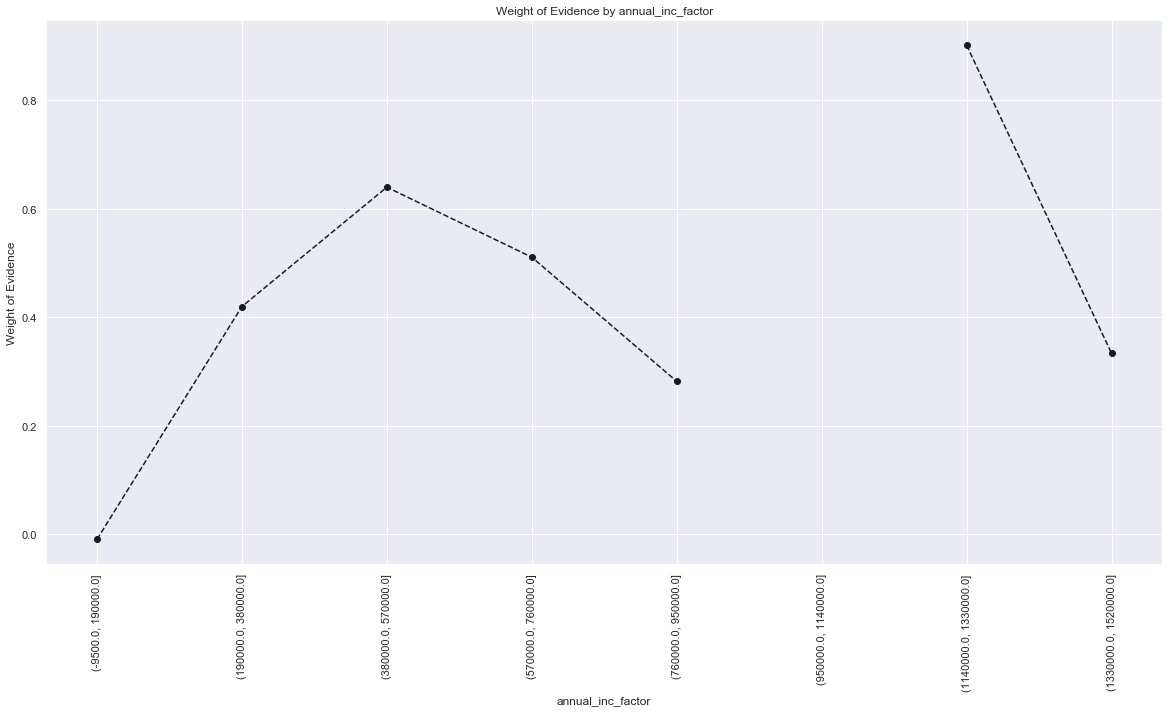

In [75]:
plot_woe(df_temp, 90)

In [77]:
df_inputs_prepr['annual_inc:<190K'] = np.where((df_inputs_prepr['annual_inc'] <= 190000), 1, 0)
df_inputs_prepr['annual_inc:>190K'] = np.where((df_inputs_prepr['annual_inc'] >= 190000), 1, 0)

## Prerocessing the Test Set

In [80]:
#####
loan_inputs_train = df_inputs_prepr
#####
#loan_data_inputs_test = df_inputs_prepr

In [ ]:
loan_inputs_train.to_csv('loan_inputs_train.csv')
loan_targets_train.to_csv('loan_targets_train.csv')
#loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
#loan_data_targets_test.to_csv('loan_data_targets_test.csv')